In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2021-01-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2021_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-01-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7440    ÎèôÎûòÍµ¨  10125    ÎèôÎûòÍµ¨   
1   2021-01-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6350    ÎèôÎûòÍµ¨   6900    ÎèôÎûòÍµ¨   
2   2021-01-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  15800    ÎèôÎûòÍµ¨  16600    ÎèôÎûòÍµ¨   
3   2021-01-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000    ÎèôÎûòÍµ¨   4900    ÎèôÎûòÍµ¨   
4   2021-01-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980    ÎèôÎûòÍµ¨   3180    ÎèôÎûòÍµ¨   
5   2021-01-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6280    ÎèôÎûòÍµ¨   8100    ÎèôÎûòÍµ¨   
6   2021-01-07     ÎåÄÌåå                      1.0„éè   4600    ÎèôÎûòÍµ¨   6414    ÎèôÎûòÍµ¨   
7   2021-01-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6900    ÎèôÎûòÍµ¨   8000    ÎèôÎûòÍµ¨   
8   2021-01-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4550    ÎèôÎûòÍµ¨   5194    ÎèôÎûòÍµ¨   
9   2021-01-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    676    ÎèôÎûòÍµ¨   
10  2021-01-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1450    ÎèôÎûòÍµ¨   
11  2021-01-07      Î¨¥                   2.0„éè 1Í∞ú   1680    ÎèôÎûòÍµ¨   1990    ÎèôÎûòÍµ¨   
12  2021-01-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080    ÎèôÎûòÍµ¨   3430    ÎèôÎûòÍµ¨   
13  2021-01-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2163    ÎèôÎûòÍµ¨   2800    ÎèôÎûòÍµ¨   
14  2021-01-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  46035    ÎèôÎûòÍµ¨  47900    ÎèôÎûòÍµ¨   
15  2021-01-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1500    ÎèôÎûòÍµ¨   2490    ÎèôÎûòÍµ¨   
16  2021-01-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4900    ÎèôÎûòÍµ¨   6930    ÎèôÎûòÍµ¨   
17  2021-01-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÎèôÎûòÍµ¨  13850    ÎèôÎûòÍµ¨   
18  2021-01-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14100    ÎèôÎûòÍµ¨  26290    ÎèôÎûòÍµ¨   
19  2021-01-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2320    ÎèôÎûòÍµ¨   2450    ÎèôÎûòÍµ¨   
20  2021-01-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
21  2021-01-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1190    ÎèôÎûòÍµ¨   
22  2021-01-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49000    ÎèôÎûòÍµ¨  57000    ÎèôÎûòÍµ¨   
23  2021-01-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
24  2021-01-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  57900    ÎèôÎûòÍµ¨  62000    ÎèôÎûòÍµ¨   
25  2021-01-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2500    ÎèôÎûòÍµ¨   3417    ÎèôÎûòÍµ¨   
26  2021-01-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5500    ÎèôÎûòÍµ¨   9142    ÎèôÎûòÍµ¨   
27  2021-01-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÎèôÎûòÍµ¨    796    ÎèôÎûòÍµ¨   
28  2021-01-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7980    ÎèôÎûòÍµ¨   
29  2021-01-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2550    ÎèôÎûòÍµ¨   
30  2021-01-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300    ÎèôÎûòÍµ¨   3300    ÎèôÎûòÍµ¨   
31  2021-01-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13906    ÎèôÎûòÍµ¨  15800    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    2685  36.09%   8,783  
1     550   8.66%   6,625  
2     800   5.06%  16,200  
3     900   22.5%   4,450  
4     200   6.71%   3,080  
5    1820  28.98%   7,190  
6    1814  39.43%   5,507  
7    1100  15.94%   7,450  
8     644  14.15%   4,872  
9       0    0.0%     676  
10     40   2.84%   1,430  
11    310  18.45%   1,835  
12    350  11.36%   3,255  
13    637  29.45%   2,4

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2021-04-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2021_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-04-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   3800    ÎèôÎûòÍµ¨  10125    ÎèôÎûòÍµ¨   
1   2021-04-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6350    ÎèôÎûòÍµ¨   6980    ÎèôÎûòÍµ¨   
2   2021-04-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11200    ÎèôÎûòÍµ¨  15800    ÎèôÎûòÍµ¨   
3   2021-04-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3680    ÎèôÎûòÍµ¨   3780    ÎèôÎûòÍµ¨   
4   2021-04-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5580    ÎèôÎûòÍµ¨   8600    ÎèôÎûòÍµ¨   
5   2021-04-08     ÎåÄÌåå                      1.0„éè   7128    ÎèôÎûòÍµ¨   8580    ÎèôÎûòÍµ¨   
6   2021-04-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   6900    ÎèôÎûòÍµ¨  11000    ÎèôÎûòÍµ¨   
7   2021-04-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5100    ÎèôÎûòÍµ¨   5194    ÎèôÎûòÍµ¨   
8   2021-04-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    676    ÎèôÎûòÍµ¨   
9   2021-04-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1450    ÎèôÎûòÍµ¨   
10  2021-04-08      Î¨¥                   2.0„éè 1Í∞ú   1200    ÎèôÎûòÍµ¨   1816    ÎèôÎûòÍµ¨   
11  2021-04-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430    ÎèôÎûòÍµ¨   3500    ÎèôÎûòÍµ¨   
12  2021-04-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  49124    ÎèôÎûòÍµ¨  51000    ÎèôÎûòÍµ¨   
13  2021-04-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3000    ÎèôÎûòÍµ¨   4990    ÎèôÎûòÍµ¨   
14  2021-04-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4900    ÎèôÎûòÍµ¨   6353    ÎèôÎûòÍµ¨   
15  2021-04-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780    ÎèôÎûòÍµ¨  13900    ÎèôÎûòÍµ¨   
16  2021-04-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  19900    ÎèôÎûòÍµ¨  26290    ÎèôÎûòÍµ¨   
17  2021-04-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1983    ÎèôÎûòÍµ¨   2680    ÎèôÎûòÍµ¨   
18  2021-04-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
19  2021-04-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1190    ÎèôÎûòÍµ¨   
20  2021-04-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  34000    ÎèôÎûòÍµ¨  59000    ÎèôÎûòÍµ¨   
21  2021-04-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950    ÎèôÎûòÍµ¨   6980    ÎèôÎûòÍµ¨   
22  2021-04-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  60900    ÎèôÎûòÍµ¨  63000    ÎèôÎûòÍµ¨   
23  2021-04-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3400    ÎèôÎûòÍµ¨   3417    ÎèôÎûòÍµ¨   
24  2021-04-08    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   7600    ÎèôÎûòÍµ¨   9335    ÎèôÎûòÍµ¨   
25  2021-04-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÎèôÎûòÍµ¨    796    ÎèôÎûòÍµ¨   
26  2021-04-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6600    ÎèôÎûòÍµ¨   7980    ÎèôÎûòÍµ¨   
27  2021-04-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2500    ÎèôÎûòÍµ¨   2550    ÎèôÎûòÍµ¨   
28  2021-04-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300    ÎèôÎûòÍµ¨   3300    ÎèôÎûòÍµ¨   
29  2021-04-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15800    ÎèôÎûòÍµ¨  16706    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6325  166.45%   6,963  
1     630    9.92%   6,665  
2    4600   41.07%  13,500  
3     100    2.72%   3,730  
4    3020   54.12%   7,090  
5    1452   20.37%   7,854  
6    4100   59.42%   8,950  
7      94    1.84%   5,147  
8       0     0.0%     676  
9      40    2.84%   1,430  
10    616   51.33%   1,508  
11     70    2.04%   3,465  
12   1876    3.82%  50,062  
13   1990   66.33%   3,995  
14   1453   29.65%   5,627  
15    120    0.87%  13,840  
16   6390   32.11%  23,095  
17    697   35.15%   2,332  
18    210   13.29%   1,685  
19      0     0.0%   1,190  
20  25000   73

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2021-07-08"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2021_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-07-08   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7450    ÎèôÎûòÍµ¨   8175    ÎèôÎûòÍµ¨   
1   2021-07-08     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6500    ÎèôÎûòÍµ¨   6900    ÎèôÎûòÍµ¨   
2   2021-07-08     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11000    ÎèôÎûòÍµ¨  15468    ÎèôÎûòÍµ¨   
3   2021-07-08    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4000    ÎèôÎûòÍµ¨   5750    ÎèôÎûòÍµ¨   
4   2021-07-08     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3880    ÎèôÎûòÍµ¨   4280    ÎèôÎûòÍµ¨   
5   2021-07-08    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6780    ÎèôÎûòÍµ¨   8900    ÎèôÎûòÍµ¨   
6   2021-07-08     ÎåÄÌåå                      1.0„éè   2650    ÎèôÎûòÍµ¨   3138    ÎèôÎûòÍµ¨   
7   2021-07-08   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  10900    ÎèôÎûòÍµ¨  14900    ÎèôÎûòÍµ¨   
8   2021-07-08     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5100    ÎèôÎûòÍµ¨   5194    ÎèôÎûòÍµ¨   
9   2021-07-08     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676    ÎèôÎûòÍµ¨    676    ÎèôÎûòÍµ¨   
10  2021-07-08     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1450    ÎèôÎûòÍµ¨   
11  2021-07-08      Î¨¥                   2.0„éè 1Í∞ú   1980    ÎèôÎûòÍµ¨   1990    ÎèôÎûòÍµ¨   
12  2021-07-08    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÎèôÎûòÍµ¨   3500    ÎèôÎûòÍµ¨   
13  2021-07-08     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9900    ÎèôÎûòÍµ¨  10100    ÎèôÎûòÍµ¨   
14  2021-07-08      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  55303    ÎèôÎûòÍµ¨  56500    ÎèôÎûòÍµ¨   
15  2021-07-08     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2980    ÎèôÎûòÍµ¨   3990    ÎèôÎûòÍµ¨   
16  2021-07-08  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900    ÎèôÎûòÍµ¨   6930    ÎèôÎûòÍµ¨   
17  2021-07-08   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12500    ÎèôÎûòÍµ¨  13800    ÎèôÎûòÍµ¨   
18  2021-07-08     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  20204    ÎèôÎûòÍµ¨  20500    ÎèôÎûòÍµ¨   
19  2021-07-08    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2160    ÎèôÎûòÍµ¨   2680    ÎèôÎûòÍµ¨   
20  2021-07-08     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580    ÎèôÎûòÍµ¨   1800    ÎèôÎûòÍµ¨   
21  2021-07-08     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190    ÎèôÎûòÍµ¨   1200    ÎèôÎûòÍµ¨   
22  2021-07-08    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  50000    ÎèôÎûòÍµ¨  57900    ÎèôÎûòÍµ¨   
23  2021-07-08    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5750    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
24  2021-07-08      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  60900    ÎèôÎûòÍµ¨  63000    ÎèôÎûòÍµ¨   
25  2021-07-08     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1600    ÎèôÎûòÍµ¨   1910    ÎèôÎûòÍµ¨   
26  2021-07-08    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5500    ÎèôÎûòÍµ¨   8653    ÎèôÎûòÍµ¨   
27  2021-07-08     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÎèôÎûòÍµ¨    833    ÎèôÎûòÍµ¨   
28  2021-07-08    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6950    ÎèôÎûòÍµ¨   7980    ÎèôÎûòÍµ¨   
29  2021-07-08   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÎèôÎûòÍµ¨   2600    ÎèôÎûòÍµ¨   
30  2021-07-08     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2600    ÎèôÎûòÍµ¨   3400    ÎèôÎûòÍµ¨   
31  2021-07-08    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  15800    ÎèôÎûòÍµ¨  16706    ÎèôÎûòÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    725   9.73%   7,813  
1    400   6.15%   6,700  
2   4468  40.62%  13,234  
3   1750  43.75%   4,875  
4    400  10.31%   4,080  
5   2120  31.27%   7,840  
6    488  18.42%   2,894  
7   4000   36.7%  12,900  
8     94   1.84%   5,147  
9      0    0.0%     676  
10    40   2.84%   1,430  
11    10   0.51%   1,985  
12     0    0.0%   3,500  
13   200   2.02%  10,000  
14  1197  

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎèôÎûòÍµ¨"
region_code = "7"
target_date = "2021-10-07"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎèôÎûòÍµ¨2021_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2021-10-07   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5940    ÎèôÎûòÍµ¨   6450    ÎèôÎûòÍµ¨   
1   2021-10-07     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6900    ÎèôÎûòÍµ¨   6980    ÎèôÎûòÍµ¨   
2   2021-10-07     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   9900    ÎèôÎûòÍµ¨  15800    ÎèôÎûòÍµ¨   
3   2021-10-07    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3933    ÎèôÎûòÍµ¨   4000    ÎèôÎûòÍµ¨   
4   2021-10-07     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3880    ÎèôÎûòÍµ¨   4280    ÎèôÎûòÍµ¨   
5   2021-10-07    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5066    ÎèôÎûòÍµ¨   8900    ÎèôÎûòÍµ¨   
6   2021-10-07     ÎåÄÌåå                      1.0„éè   3300    ÎèôÎûòÍµ¨   3683    ÎèôÎûòÍµ¨   
7   2021-10-07   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12750    ÎèôÎûòÍµ¨  15400    ÎèôÎûòÍµ¨   
8   2021-10-07     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5100    ÎèôÎûòÍµ¨   5194    ÎèôÎûòÍµ¨   
9   2021-10-07     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    736    ÎèôÎûòÍµ¨    736    ÎèôÎûòÍµ¨   
10  2021-10-07     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410    ÎèôÎûòÍµ¨   1450    ÎèôÎûòÍµ¨   
11  2021-10-07      Î¨¥                   2.0„éè 1Í∞ú   1650    ÎèôÎûòÍµ¨   1790    ÎèôÎûòÍµ¨   
12  2021-10-07    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500    ÎèôÎûòÍµ¨   3500    ÎèôÎûòÍµ¨   
13  2021-10-07     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3300    ÎèôÎûòÍµ¨   9900    ÎèôÎûòÍµ¨   
14  2021-10-07      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  24450    ÎèôÎûòÍµ¨  38500    ÎèôÎûòÍµ¨   
15  2021-10-07     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3620    ÎèôÎûòÍµ¨   4990    ÎèôÎûòÍµ¨   
16  2021-10-07  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3480    ÎèôÎûòÍµ¨   3900    ÎèôÎûòÍµ¨   
17  2021-10-07   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  12900    ÎèôÎûòÍµ¨  13800    ÎèôÎûòÍµ¨   
18  2021-10-07     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15000    ÎèôÎûòÍµ¨  16900    ÎèôÎûòÍµ¨   
19  2021-10-07    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816    ÎèôÎûòÍµ¨   2680    ÎèôÎûòÍµ¨   
20  2021-10-07     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1780    ÎèôÎûòÍµ¨   1800    ÎèôÎûòÍµ¨   
21  2021-10-07     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1260    ÎèôÎûòÍµ¨   1280    ÎèôÎûòÍµ¨   
22  2021-10-07    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  50000    ÎèôÎûòÍµ¨  59000    ÎèôÎûòÍµ¨   
23  2021-10-07    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980    ÎèôÎûòÍµ¨   6950    ÎèôÎûòÍµ¨   
24  2021-10-07      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  56500    ÎèôÎûòÍµ¨  60900    ÎèôÎûòÍµ¨   
25  2021-10-07     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2000    ÎèôÎûòÍµ¨   2390    ÎèôÎûòÍµ¨   
26  2021-10-07    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5642    ÎèôÎûòÍµ¨   6000    ÎèôÎûòÍµ¨   
27  2021-10-07     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796    ÎèôÎûòÍµ¨    900    ÎèôÎûòÍµ¨   
28  2021-10-07    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7750    ÎèôÎûòÍµ¨   7980    ÎèôÎûòÍµ¨   
29  2021-10-07   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550    ÎèôÎûòÍµ¨   2600    ÎèôÎûòÍµ¨   
30  2021-10-07     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2850    ÎèôÎûòÍµ¨   3550    ÎèôÎûòÍµ¨   
31  2021-10-07    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13600    ÎèôÎûòÍµ¨  15773    ÎèôÎûòÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     510   8.59%   6,195  
1      80   1.16%   6,940  
2    5900   59.6%  12,850  
3      67    1.7%   3,967  
4     400  10.31%   4,080  
5    3834  75.68%   6,983  
6     383  11.61%   3,492  
7    2650  20.78%  14,075  
8      94   1.84%   5,147  
9       0    0.0%     736  
10     40   2.84%   1,430  
11    140   8.48%   1,720  
12      0    0.0%   3,500  
13   6600  200.0%   6,6

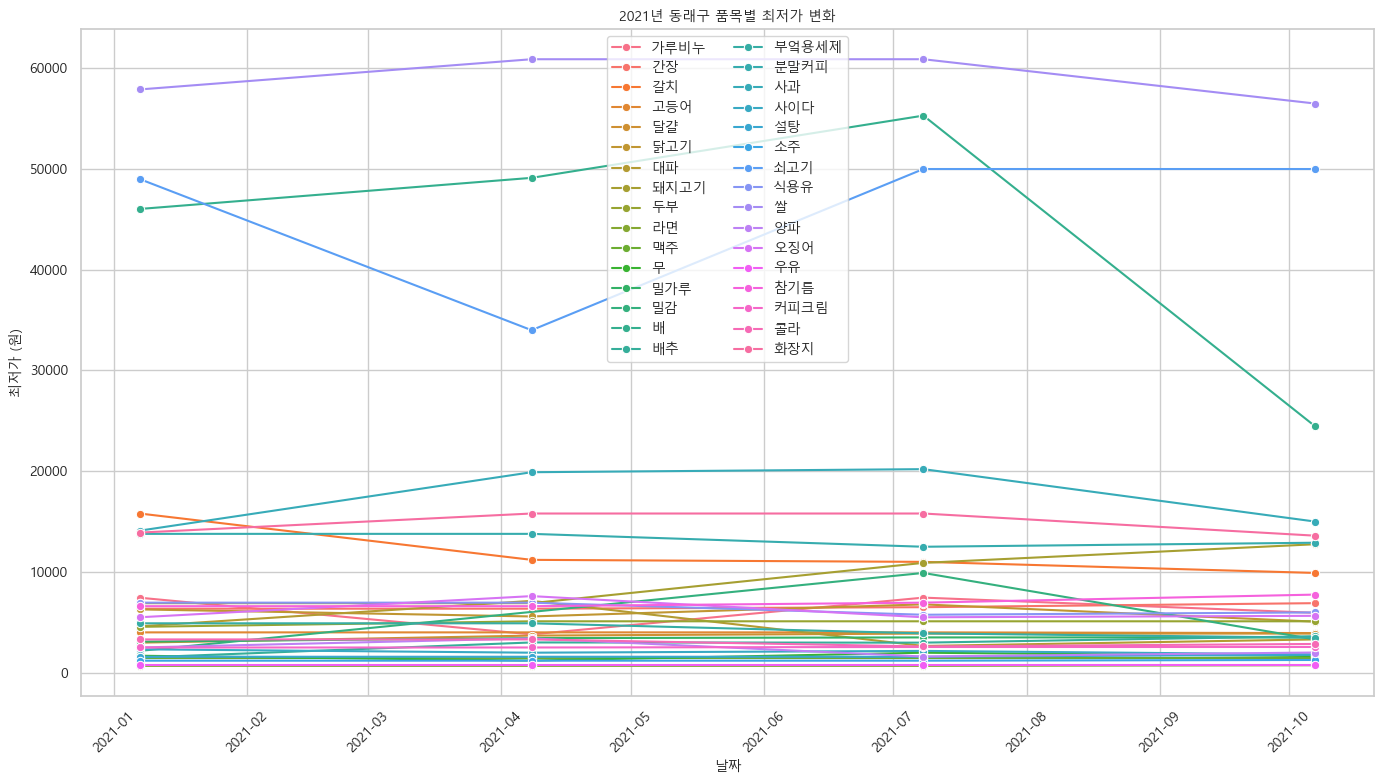

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎèôÎûòÍµ¨2021_1q.csv")
q2 = pd.read_csv("ÎèôÎûòÍµ¨2021_2q.csv")
q3 = pd.read_csv("ÎèôÎûòÍµ¨2021_3q.csv")
q4 = pd.read_csv("ÎèôÎûòÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ ÎèôÎûòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎèôÎûòÍµ¨2021_min.csv", index=False, encoding="utf-8-sig")

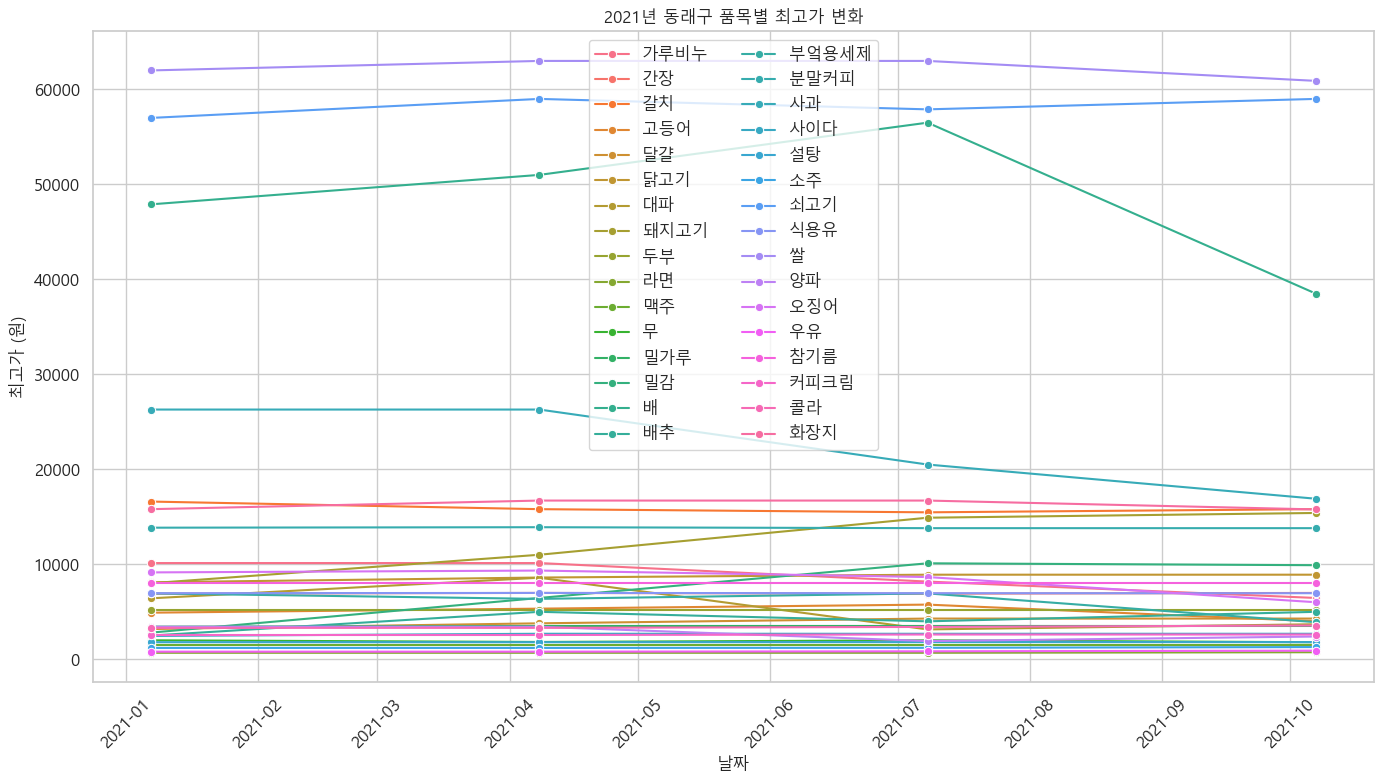

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎèôÎûòÍµ¨2021_1q.csv")
q2 = pd.read_csv("ÎèôÎûòÍµ¨2021_2q.csv")
q3 = pd.read_csv("ÎèôÎûòÍµ¨2021_3q.csv")
q4 = pd.read_csv("ÎèôÎûòÍµ¨2021_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2021ÎÖÑ ÎèôÎûòÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎèôÎûòÍµ¨2021_max.csv", index=False, encoding="utf-8-sig")